In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('data/train.csv')
df = pd.DataFrame(df)

print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (891, 12)
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [111]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [113]:
print("Info:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Info: None


Preliminary Findings:
1. Cabin has a lot of null values. So, dropping it.
2. Need to impute Age and Embarked.
3. PassengerID, Name, Ticket seem unrelated for this scenario. So, dropping these.
4. SibSp and Parch can be combined to create a new feature called "Family Size".

Data Visualization

In [114]:
df_num = df[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df[['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']]

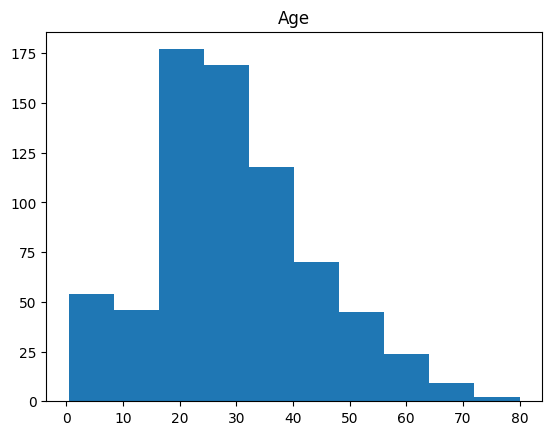

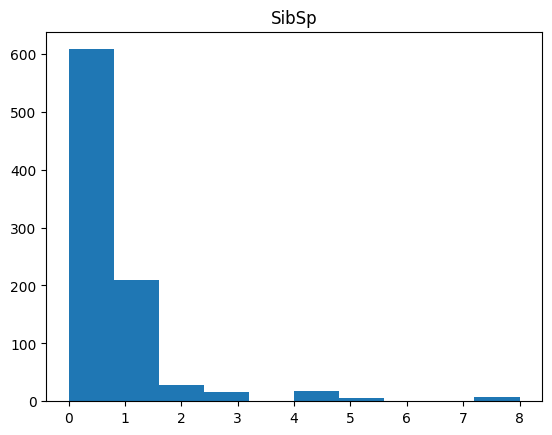

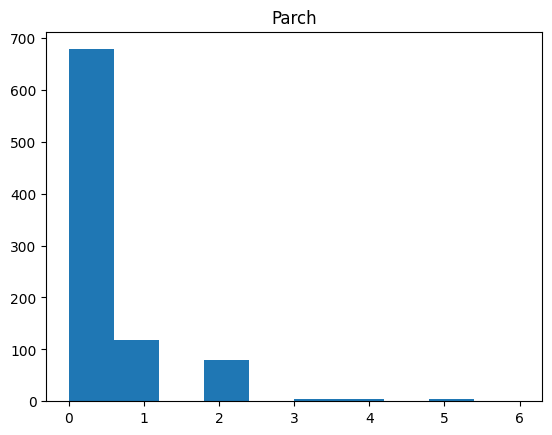

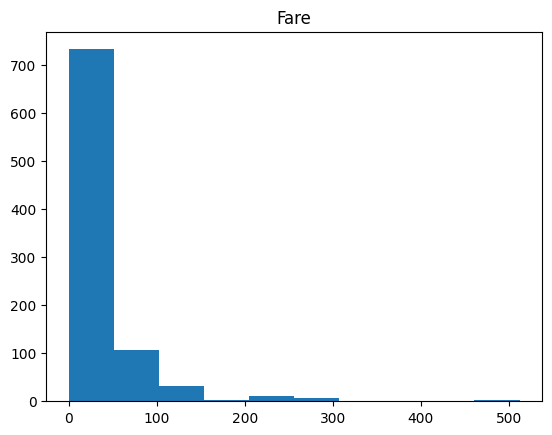

In [115]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<Axes: >

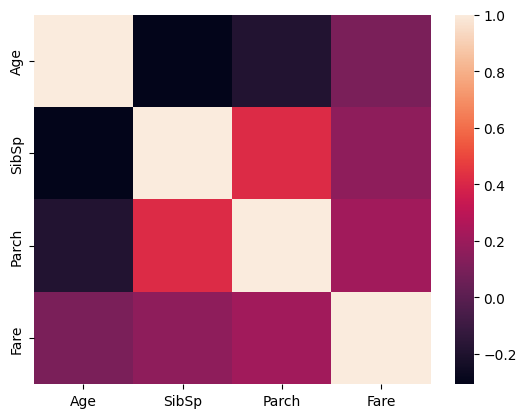

In [116]:
sns.heatmap(df_num.corr())

In [117]:
pd.pivot_table(df, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


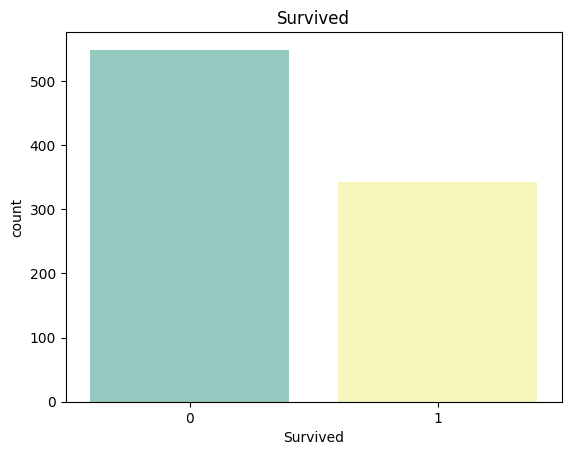

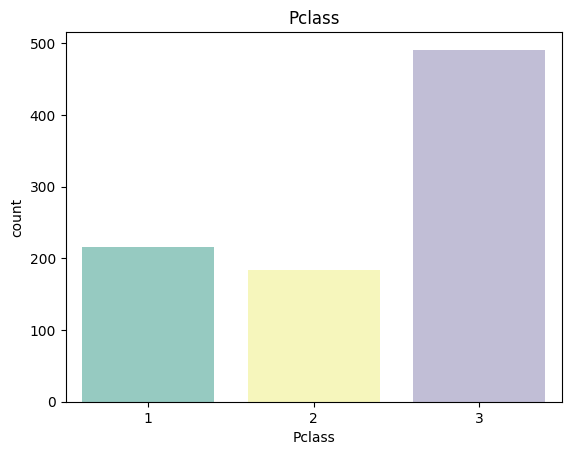

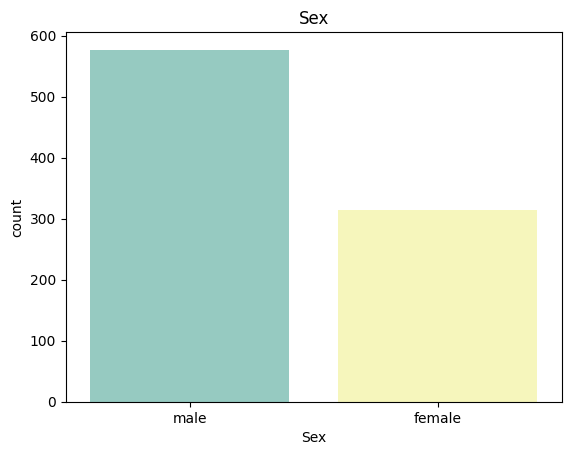

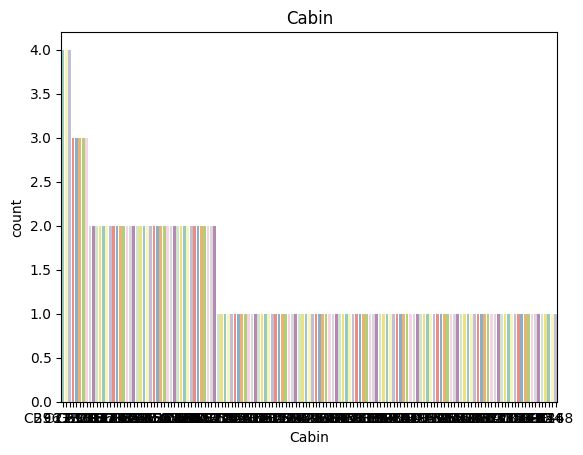

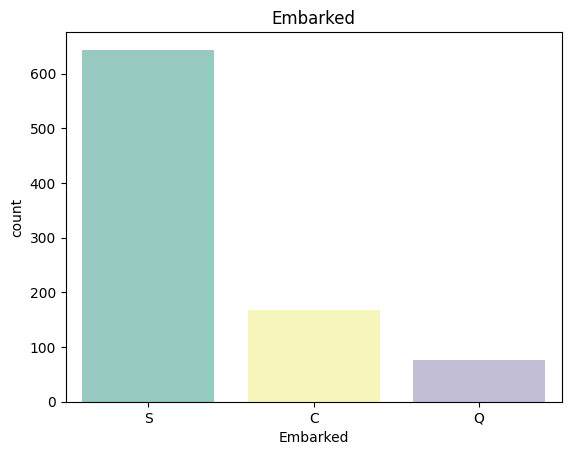

In [118]:
for i in df_cat.columns:
   sns.barplot(x = df_cat[i].value_counts().index, y= df_cat[i].value_counts(),hue=df_cat[i].value_counts().index, palette = 'Set3', legend = False).set_title(i)
   plt.show()

Data Pre-processing (Train set)

In [119]:
# Dropping columns
cols = ['Name', 'PassengerId', 'Ticket', 'Cabin']

df = df.drop(cols, axis = 1)

In [120]:
# Creating a new feature by combining SibSp and Parch
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

In [121]:
# Categorical Encoding
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [122]:
df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Family_Size      0
dtype: int64

In [123]:
df['Embarked'].isnull().sum()

2

In [124]:
# Impute Embarked with majority class
df['Embarked'] = df['Embarked'].fillna(2)

<Axes: >

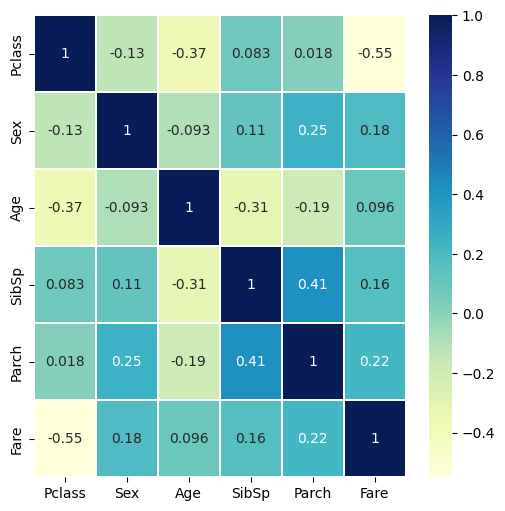

In [125]:
corr_matrix = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

plt.figure(figsize = (6, 6))
sns.heatmap(data = corr_matrix, cmap='YlGnBu', annot = True, linewidths = 0.2)

In [126]:
# Imputing Age with median Age of rows: PClass, SibSp and Parch due to correlation
NaN_indexes = df['Age'][df['Age'].isnull()].index

for i in NaN_indexes:
    pred_age = df['Age'][((df.SibSp == df.iloc[i]["SibSp"]) & (df.Parch == df.iloc[i]["Parch"]) & (df.Pclass == df.iloc[i]["Pclass"]))].median()
    if not np.isnan(pred_age):
        df['Age'].iloc[i] = pred_age
    else:
        df['Age'].iloc[i] = df['Age'].median()

C:\Users\Fazle Labib\AppData\Local\Temp\ipykernel_2736\3655176710.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Age'].iloc[i] = pred_age
C:\Users\Fazle Labib\AppData\Local\Temp\ipykernel_2736\3655176710.py:7: SettingWithCopyWarning

In [127]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Family_Size    0
dtype: int64